In [181]:
import numpy as np
from sympy.solvers import solve as eq
from sympy import symbols
import pandas as pd
from sympy import integrate as integral
import matplotlib.pyplot as plt

Informações do material

$$ \sigma_{esc} = 276 \: MPa$$
Fonte: <http://www.matweb.com/search/DataSheet.aspx?MatGUID=b8d536e0b9b54bd7b69e4124d8f1d20a&ckck=1>

In [182]:
𝜎esc = 276*10**6

# ![markdown](https://http2.mlstatic.com/D_NQ_NP_989405-MLB31088226893_062019-O.webp)

In [183]:
A = 50.8 #mm
B = 3.18 #mm

# ![markdown](https://i.ibb.co/qs9YZWn/imagem-2021-11-23-143821.png)

In [184]:
l = 2
d1 = 1
d2 = 1.5
F1 = 80*9.81
F2 = 30*9.81

Figura 1: Estado triaxial de tensão
# ![markdown](https://i.ibb.co/kh70vV2/EGT.png)
Fonte: Hibbeler

Invariantes do tensor de tensão

$$ I_{1} = \sigma_{xx}+\sigma_{yy}+\sigma_{zz}$$


$$I_{2} = det \begin{pmatrix} \sigma_{xx} & \tau_{xy} \\ \tau_{xy} & \sigma_{yy} \end{pmatrix} + det \begin{pmatrix} \sigma_{xx} & \tau_{xz} \\ \tau_{xz} & \sigma_{zz} \end{pmatrix} + det \begin{pmatrix} \sigma_{yy} & \tau_{yz} \\ \tau_{yz} & \sigma_{zz} \end{pmatrix} $$


$$I_{2} = det \begin{pmatrix} \sigma_{xx} & \tau_{xy} & \tau_{xz} \\ \tau_{xy} & \sigma_{yy} & \tau_{yz} \\ \tau_{xz} & \tau_{yz} & \sigma_{zz} \end{pmatrix} $$

In [185]:
def I1(𝜎xx, 𝜎yy, 𝜎zz):
    return round(𝜎xx + 𝜎yy + 𝜎zz, 6)

def I2(𝜎xx, 𝜎yy, 𝜎zz, 𝜏xy, 𝜏xz, 𝜏yz):
    
    array_1 = np.linalg.det( np.array([ [𝜎xx,  𝜏xy], [𝜏xy,  𝜎yy] ], dtype=float) )
    array_2 = np.linalg.det( np.array([ [𝜎xx,  𝜏xz], [𝜏xz,  𝜎zz] ], dtype=float) )
    array_3 = np.linalg.det( np.array([ [𝜎yy,  𝜏yz], [𝜏yz,  𝜎zz] ], dtype=float) )
    
    array = array_1 + array_2 + array_3 
            
    return round(array, 6) 

def I3(𝜎xx, 𝜎yy, 𝜎zz, 𝜏xy, 𝜏xz, 𝜏yz):

    array = np.array([[𝜎xx, 𝜏xy, 𝜏xz],
                      [𝜏xy, 𝜎yy, 𝜏yz],
                      [𝜏xz, 𝜏yz, 𝜎zz]], dtype=float)
                      
    return round(np.linalg.det( array ), 6)

Tensões principais

$$ -\sigma^3 + I_{1}\sigma^2 - I_{2}\sigma + I_{3} = 0$$

In [186]:
𝜎 = symbols('𝜎')
def tp(𝜎xx, 𝜎yy, 𝜎zz, 𝜏xy, 𝜏xz, 𝜏yz):
    return eq(-(𝜎**3) + (I1(𝜎xx, 𝜎yy, 𝜎zz)*𝜎**2) - I2(𝜎xx, 𝜎yy, 𝜎zz, 𝜏xy, 𝜏xz, 𝜏yz)*𝜎 + I3(𝜎xx, 𝜎yy, 𝜎zz, 𝜏xy, 𝜏xz, 𝜏yz), 𝜎)

Tensões

$$ \sigma_{yy} = \frac{My}{I} \: \: \: \: \: \: \: \: \: \: \tau_{yz} = \frac{VQ}{It}  $$
$$ I = \int_{A} y^2 \,dA \: \: \: \: \: \: \: \: \: \: Q = \int_{A} y \,dA^{'} $$

$$ Momento \: \: de \: \: inércia $$
$$ I = \frac{1}{12} (b_{ext}h_{ext}^3 - b_{in}h_{in}^3) $$

In [187]:
def I(h, b, e):
    hi = h - 2*e
    bi = b - 2*e
    return (1/12)*( (b*h**3) - (bi*hi**3) )

Reações

In [188]:
R1 = (1/l)*( F1*(l - d1) + F2*(l - d2) )
R2 = (1/l)*(F1*d1 + F2*d2)

Cálculo das seções

$$ 0 \leq y \leq 1 $$

In [189]:
def M1(y):
    return -R1*y

def V1(y):
    return R1

$$ 1 \leq y \leq 1.5 $$

In [190]:
def M2(y):
    return -R1*y + F1*(y - d1)

def V2(y):
    return F1 - R1

$$ 1.5 \leq y \leq 2 $$

In [191]:
def M3(y):
    return -R1*y + F1*(y - d1) + F2*(y - d2)

def V3(y):
    return F1 + F2 - R1

Definindo lista - intervalo de comprimento

In [192]:
y_1 = np.arange(0, d1+0.1, 0.2)
y_2 = np.arange(d1, d2+0.05,  0.1)
y_3 = np.arange(d2, l+0.05,  0.1)

Criando lista de valores de Momento e Cortante

In [193]:
array_1 = []
array_2 = []
array_3 = []

array_1_c = []
array_2_c = []
array_3_c = []

for c in range( len(y_1) ):
    array_1.append( M1(y_1[c]) )
    array_1_c.append( V1(y_1[c]) )

for c in range( len(y_2) ):
    array_2.append( M2(y_2[c]) )
    array_2_c.append( V2(y_1[c]) )

for c in range( len(y_3) ):
    array_3.append( M3( y_3[c] ) )
    array_3_c.append( V3(y_1[c]) )

Agrupando todos os valores do Momento e da Cortante em uma unica lista

In [194]:
array_m = []
array_y = []
array_c = []

for c in range(len(y_1)):
    array_y.append(y_1[c])
    array_m.append(array_1[c])
    array_c.append(array_1_c[c])

for c in range(len(y_2)):
    array_y.append(y_2[c])
    array_m.append(array_2[c])
    array_c.append(array_2_c[c])

for c in range(len(y_3)):
    array_y.append(y_3[c])
    array_m.append(array_3[c])
    array_c.append(array_3_c[c])

Criando tabela de dados

In [195]:
data_1 = {

    'y [m]': array_y,
    'M [N.m]': array_m,
    'V [N]': array_c
}

df_1 = pd.DataFrame(data_1, dtype=float).round(4)

display(df_1)

,y [m],M [N.m],V [N]
0,0.0,-0.0000,465.975
1,0.2,-93.1950,465.975
2,0.4,-186.3900,465.975
3,0.6,-279.5850,465.975
4,0.8,-372.7800,465.975
5,1.0,-465.9750,465.975
6,1.0,-465.9750,318.825
7,1.1,-434.0925,318.825
8,1.2,-402.2100,318.825
9,1.3,-370.3275,318.825


Obtendo valor máximo absoluto do Momento e da Cortante

In [196]:
m_max = round(max(np.absolute(array_m)), 4)
c_max = round(max(np.absolute(array_c)), 4)

Gerando os diagramas de Momento e Cortante

No handles with labels found to put in legend.
<ipython-input-197-3695c3fa40ff>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes.xaxis.set_ticklabels(np.arange(-0.25, 3, 0.25))


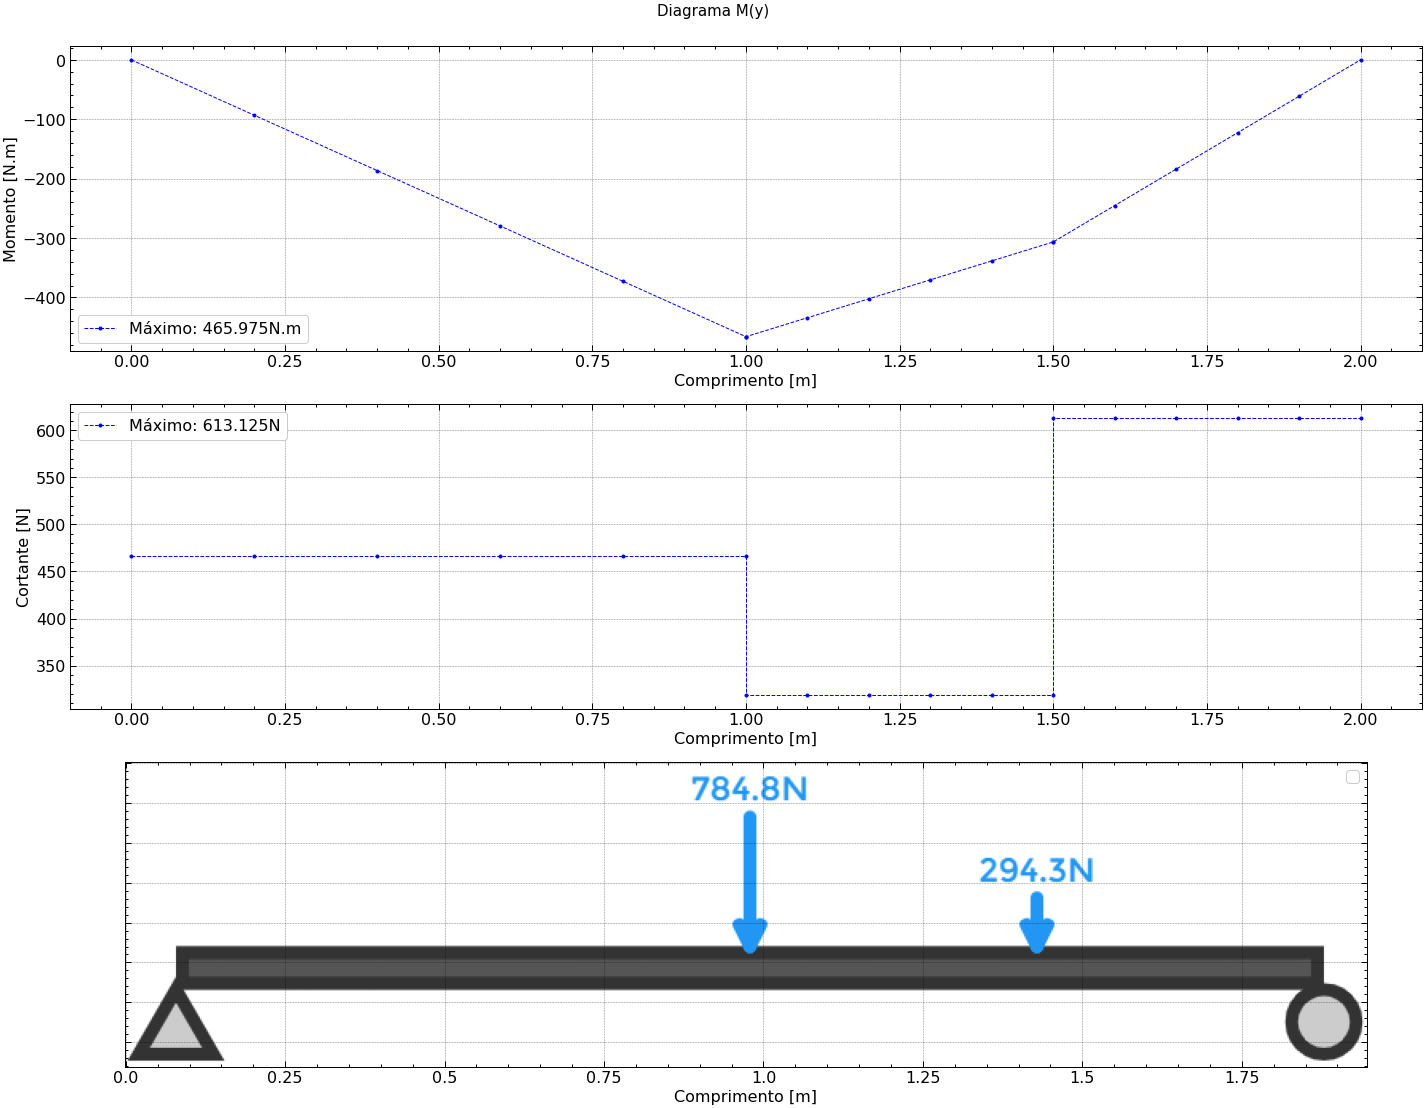

In [197]:
plt.style.use(['science', 'notebook', 'grid'])

img_path = 'https://i.ibb.co/Xtvjgwh/viga.png'

fig, axes = plt.subplots(3, 1, figsize=(20,15))

ax = axes[0]

ax.plot(array_y, array_m, 'o--', color='blue', lw=1, ms=3, label = 'Máximo: {}N.m' .format(m_max))
ax.set_xlabel('Comprimento [m]')
ax.set_ylabel('Momento [N.m]')
ax.legend()

ax = axes[1]

ax.plot(array_y, array_c, 'o--', color='blue', lw=1, ms=3, label = 'Máximo: {}N' .format(c_max))
ax.set_xlabel('Comprimento [m]')
ax.set_ylabel('Cortante [N]')
ax.legend()

ax = axes[2]
ax.imshow(plt.imread(img_path))
ax.set_xlabel('Comprimento [m]')
ax.legend()
fig.tight_layout()
fig.suptitle('Diagrama M(y)', y=1.03, fontsize=15)

ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels(np.arange(-0.25, 3, 0.25))
plt.show()

Resultado simulação SolidWorks

<Figure size 1440x1080 with 0 Axes>

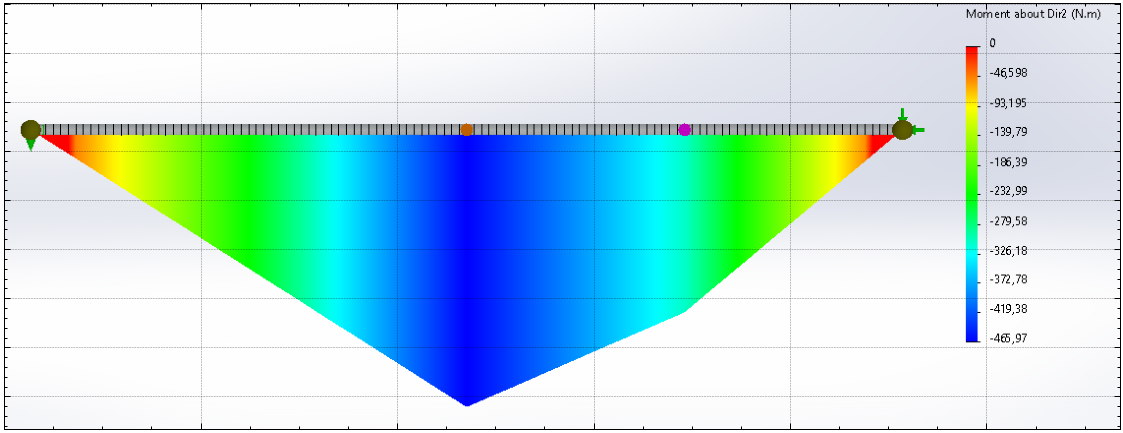

In [198]:

plt.figure(figsize=(20,15))
img_path_1 = 'https://i.ibb.co/2kYrZ6D/resultado-momento.png'

fig, axes = plt.subplots(1, 1, figsize=(20,15))

ax = axes

ax.imshow(plt.imread(img_path_1))
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

plt.show()

Resultado simulação

<Figure size 1440x1080 with 0 Axes>

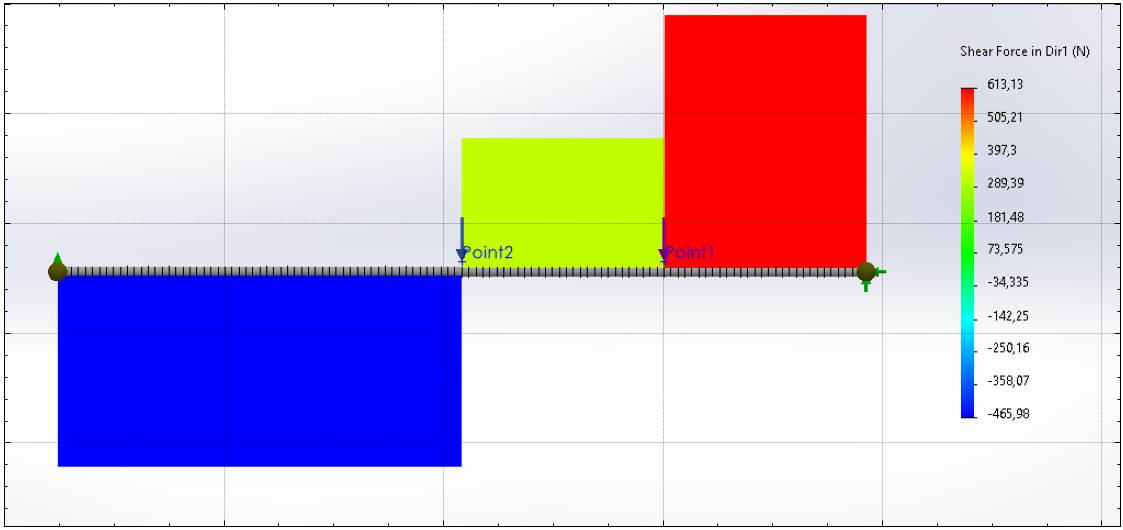

In [199]:
plt.figure(figsize=(20,15))
img_path_c = 'https://i.ibb.co/B6bppqj/resultado-shear.png'

fig, axes = plt.subplots(1, 1, figsize=(20,15))

ax = axes

ax.imshow(plt.imread(img_path_c))
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

plt.show()

Definindo os valores máximos de Momento e Cortante

In [200]:
def M():
    return m_max

def V():
    return c_max

Figura 2: Seção retangular
# ![markdown](https://i.ibb.co/3pB6zTt/Q.png)
Fonte: Hibbeler

$$ Momento \: \: estático$$
$$ Q = Q_{ext} - Q_{int} = \int_{y_{ext_{1}}}^{h_{ext}/2} yb_{ext} \,dy - \int_{y_{in_{1}}}^{h_{in}/2} yb_{in} \,dy$$

In [201]:
y = symbols('y')
def Q(b, h, e):
    bi = h - 2*e
    hi = b - 2*e
    y1 = 0  
    yi1 = 0  
    return integral(y*b, (y, y1, h/2)) - integral(y*bi, (y, yi1, hi/2))

Tensões direções dos eixos principais

In [202]:
def 𝜎x():
    return 0

def 𝜎y(m, h, b, e, y):
    return m*y/I(h, b, e)

def 𝜎z():
    return 0

Criando lista de valores para tensão no eixo y

In [203]:
array_𝜎y = []
for c in range(len(array_m)):
    array_𝜎y.append(𝜎y(m=abs(array_m[c]), h=A*10**-3, b=A*10**-3, e=B*10**-3, y=(A/2)*10**-3)/10**6)

Criando diamgrama da tensão no eixo y em relação ao comprimento

No handles with labels found to put in legend.
<ipython-input-204-1395d1347b75>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes.xaxis.set_ticklabels(np.arange(-0.25, 3, 0.25))


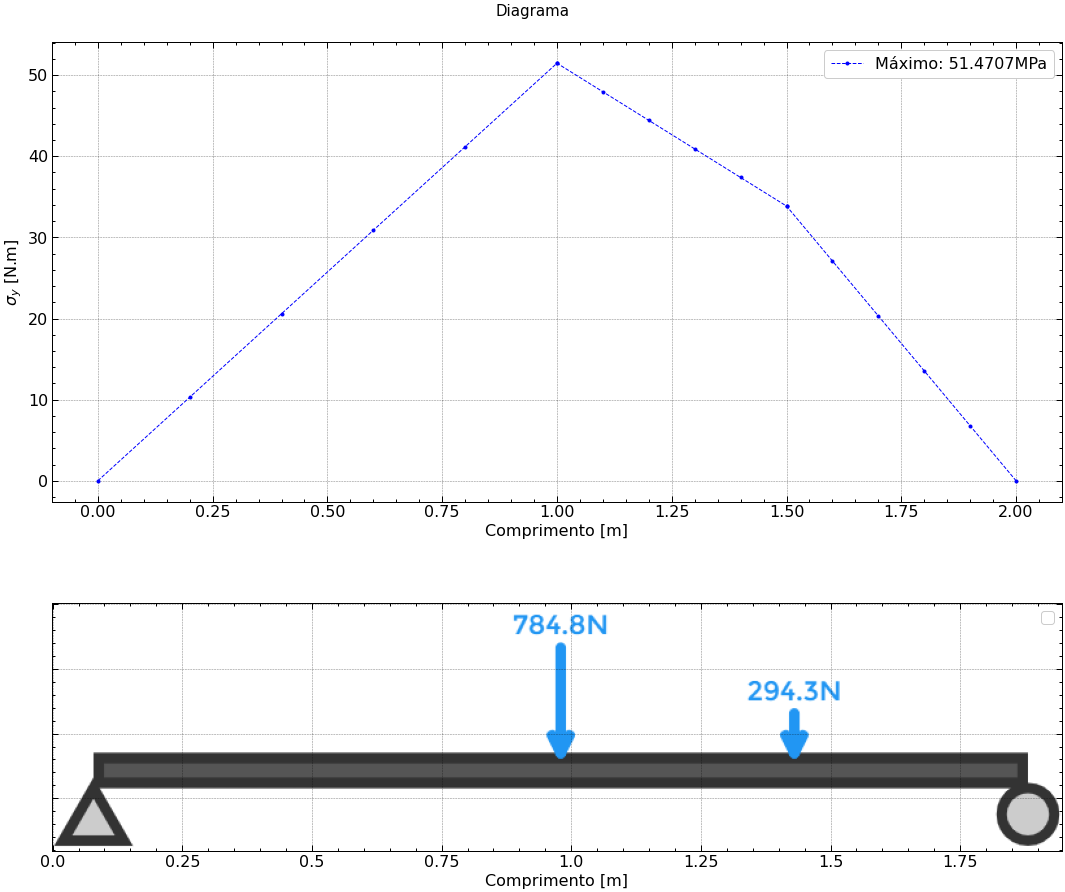

In [204]:
plt.style.use(['science', 'notebook', 'grid'])

img_path = 'https://i.ibb.co/Xtvjgwh/viga.png'

fig, axes = plt.subplots(2, 1, figsize=(15,13))

ax = axes[0]

ax.plot(array_y, array_𝜎y, 'o--', color='blue', lw=1, ms=3, label = 'Máximo: {:.4f}MPa' .format(max(array_𝜎y)))
ax.set_xlabel('Comprimento [m]')
ax.set_ylabel('$\sigma_y$ [N.m]')
ax.legend()

ax = axes[1]
ax.imshow(plt.imread(img_path))
ax.set_xlabel('Comprimento [m]')
ax.legend()
fig.tight_layout()
fig.suptitle('Diagrama', y=1.03, fontsize=15)

ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels(np.arange(-0.25, 3, 0.25))

plt.show()

Resultado simulação 

<Figure size 1440x1080 with 0 Axes>

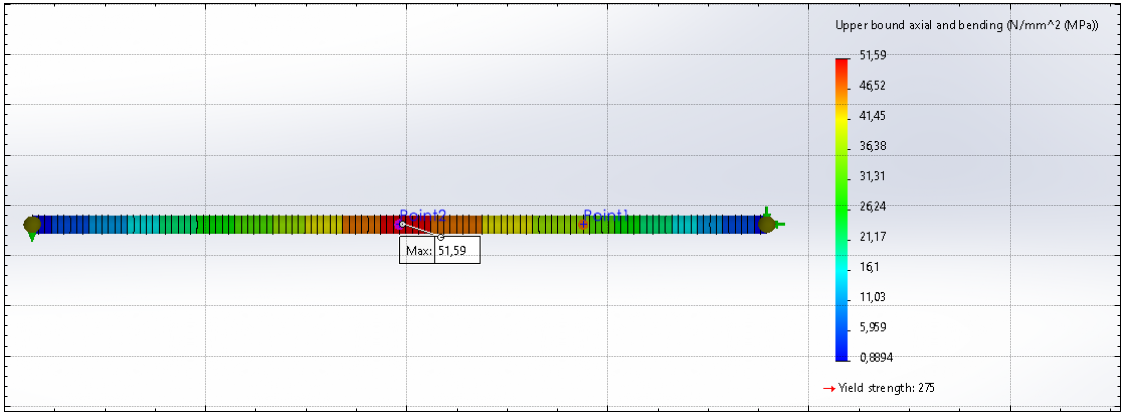

In [205]:
plt.figure(figsize=(20,15))
img_path_2 = 'img/resultado_stress.png'

fig, axes = plt.subplots(1, 1, figsize=(20,15))

ax = axes

ax.imshow(plt.imread(img_path_2))
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

plt.show()

Definindo equações das tensões cisalhantes

In [206]:
def 𝜏xy1():
    return 0

def 𝜏xz1():
    return 0

def 𝜏yz1(h, b, e):
    return V()*Q(b, h, e)/( I(h, b, e)*b )

Coeficientes de segurança

$$\eta_{tresca} = \frac{\sigma_{esc}}{\sigma_{1} - \sigma_{3}}$$

$$\eta_{VM} = \frac{\sigma_{esc}}{(\sigma_{1} + \sigma_{2} + \sigma_{3})/3}$$

Criando funções dos coeficientes de segurança de Tresca E Von Mises

In [207]:
class tresca:
    def n(m, h, b, e, y):
        𝜎3, 𝜎2, 𝜎1 = tp(𝜎xx=𝜎x(), 𝜎yy=𝜎y(m, h, b, e, y), 𝜎zz=𝜎z(), 𝜏xy=𝜏xy1(), 𝜏xz=𝜏xz1(), 𝜏yz=𝜏yz1(h, b, e))
        return round(𝜎esc/(𝜎1 - 𝜎3), 4)

class von_mises:
    def n(m, h, b, e, y):
        𝜎3, 𝜎2, 𝜎1 = tp(𝜎xx=𝜎x(), 𝜎yy=𝜎y(m, h, b, e, y), 𝜎zz=𝜎z(), 𝜏xy=𝜏xy1(), 𝜏xz=𝜏xz1(), 𝜏yz=𝜏yz1(h, b, e))
        𝜎_avg = (𝜎1 + 𝜎2 + 𝜎3)/3 
        return round(𝜎esc/(𝜎_avg), 4)

Gerando resultados

In [208]:
n_tresca = tresca.n(m =M(), h=A*10**-3, b=A*10**-3, e=B*10**-3, y=(A/2)*10**-3)
n_vm = von_mises.n(m = M(), h=A*10**-3, b=A**-3, e=B*10**-3, y=(A/2)*10**-3 )

Criando tabela de dados

In [209]:
data = {
    '': ['Tresca', 'Von Mises'],
    'η': [n_tresca, n_vm]
}

Apresentando resultados do coeficiente de segurança

In [210]:
df = pd.DataFrame(data, dtype = 'float64').round(4)

In [211]:
display(df.T)

,0,1
,Tresca,Von Mises
η,5.3619,3.256


Resultado simulação

<Figure size 1440x1080 with 0 Axes>

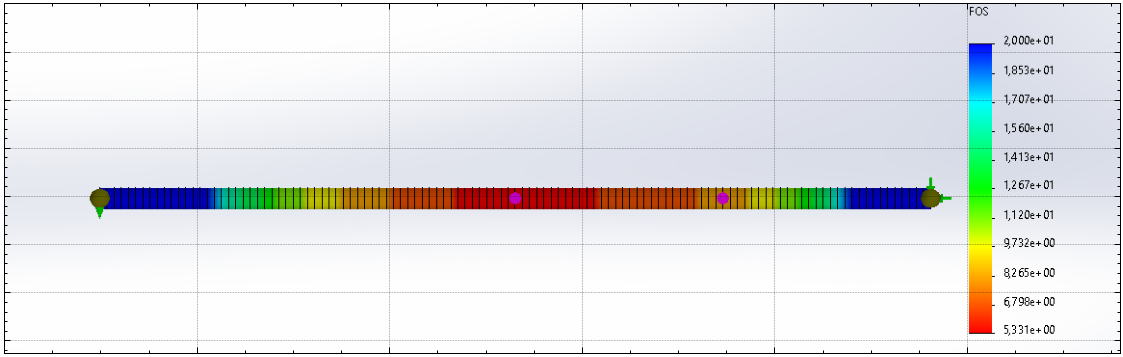

In [212]:
plt.figure(figsize=(20,15))
img_path_3 = 'https://i.ibb.co/FbbSjCf/resultado-FOS.png'

fig, axes = plt.subplots(1, 1, figsize=(20,15))

ax = axes

ax.imshow(plt.imread(img_path_3))
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])

plt.show()